In [96]:
import pandas as pd
import matplotlib.pyplot as plt


urls = [
    "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link",
    "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link",
    "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=drive_link",
    "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
]

file_names = ["df_prod.csv", "df_orders.csv", "df_orderlines.csv", "df_brands.csv"]

def read_csv_from_drive(url, file_name):
    path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
    return pd.read_csv(path)

df_prod, df_orders, df_orderlines, df_brands = [read_csv_from_drive(url, file_name) for url, file_name in zip(urls, file_names)]

df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


## **Make Copy of DataFrame**

In [97]:
df_orders_copy = df_orders.copy()
df_orderlines_copy = df_orderlines.copy()
df_prod_copy = df_prod.copy()
df_brands_copy = df_brands.copy()

## **1. Duplicates**

**Check duplicates in each dataframe and perfom cleaning steps if needed:**



In [98]:
df_orders_copy.duplicated().sum()

0

In [99]:
df_orderlines_copy.duplicated().sum()

0

In [100]:
df_prod_copy.duplicated().sum()

8746

**We have identified 8746 duplicates in the product dataframe. Considering this as the product catalog of ENIAC, we can safely remove all duplicates from this dataframe, as it will not impact the subsequent analysis.**

In [101]:
df_prod_copy = df_prod_copy.drop_duplicates()

In [102]:
df_brands_copy.duplicated().sum()

0

## **2 .info()**

In [103]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [104]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [105]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [106]:
df_brands_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


##**3.  Missing values**

In [107]:
df_orders_copy.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [108]:
df_orderlines_copy.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [109]:
df_prod_copy.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [110]:
print(f"{(df_prod_copy.price.isna().sum())} missing values represents only {((df_prod_copy.price.isna().sum()/df_prod_copy.shape[0]*100).round(2))}% of the rows in products DataFrame")

46 missing values represents only 0.43% of the rows in products DataFrame


**Therefore, we decided to drop the 46 rows**

In [111]:
#Find the index of missing data in product dataframe
indices_with_nan_price = df_prod_copy[df_prod_copy['price'].isna()].index

In [112]:
#Drop the rows with missing data
df_prod_copy.drop(indices_with_nan_price, inplace=True)

In [113]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


In [114]:
df_brands_copy.isna().sum()

short    0
long     0
dtype: int64

##**4.  Datatypes**

#**4.1. Dates**

In [115]:
df_orders_copy["created_date"] = pd.to_datetime(df_orders_copy["created_date"])

In [116]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [117]:
df_orderlines_copy["date"] = pd.to_datetime(df_orderlines_copy["date"])

In [118]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


#**4.2. Prices**

## 4.2.1. Orders and orderlines

In [119]:
df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    257814
True      36169
Name: unit_price, dtype: int64

In [120]:
two_dot_percentage = ((df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_orderlines_copy.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 12.3% of the rows in our DataFrame


In [121]:
two_dot_order_ids_list = df_orderlines_copy.loc[df_orderlines_copy.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
df_orderlines_copy = df_orderlines_copy.loc[~df_orderlines_copy.id_order.isin(two_dot_order_ids_list)]

In [122]:
df_orderlines_copy.shape[0]

216250

In [123]:
df_orderlines_copy["unit_price"] = pd.to_numeric(df_orderlines_copy["unit_price"])

In [124]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


In [125]:
df_orders_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


## 4.2.2. Product dataframe

## 4.2.2.1 Price

In [126]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


In [127]:
df_prod_copy.head(10)

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45,420.003,0,1230
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,0,1364
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,0,1364
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74,669.904,0,1364
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35,330.003,0,1325


In [128]:
df_prod_copy.tail()

,sku,name,desc,price,promo_price,in_stock,type
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392
19325,THU0063,"Enroute Thule 14L Backpack MacBook 13 ""Green",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392


In [129]:
df_prod_copy.price.str.contains("\d+\.\d+\.\d+").value_counts()

False    10157
True       377
Name: price, dtype: int64

In [130]:
two_dot_percentage_price_prod = ((df_prod_copy.price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_copy.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_price_prod}% of the rows in our DataFrame")

The 2 dot problem represents 3.58% of the rows in our DataFrame


We will drop all rows that have price with double dots

In [131]:
condition_to_drop = df_prod_copy['price'].str.contains("\d+\.\d+\.\d+")
df_prod_copy = df_prod_copy[~condition_to_drop]

In [132]:
df_prod_copy['price'] = pd.to_numeric(df_prod_copy['price'])

<ipython-input-132-c86b24bbbbca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_copy['price'] = pd.to_numeric(df_prod_copy['price'])


In [133]:
df_prod_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10157 non-null  object 
 1   name         10157 non-null  object 
 2   desc         10151 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  10157 non-null  object 
 5   in_stock     10157 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 634.8+ KB


In [134]:
df_prod_copy['price'].mean()

663.1246286305011

##4.2.2.2. Promo_Price

In [135]:
df_prod_copy.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()

False    5836
True     4321
Name: promo_price, dtype: int64

In [136]:
indices_with_double_dots_promoprice = df_prod_copy[df_prod_copy.promo_price.str.contains("\d+\.\d+\.\d+")].index

In [137]:
df_prod_copy_modified = df_prod_copy.copy()
df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'] = df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'].apply(lambda x: ''.join(x.rsplit('.', 1)))
df_prod_copy_modified.iloc[66]
df_prod_copy_modified['promo_price'] = pd.to_numeric(df_prod_copy_modified['promo_price'])
df_prod_copy_modified.loc[indices_with_double_dots_promoprice, 'promo_price'] *= 100
df_prod_copy_modified.sample(100)

,sku,name,desc,price,promo_price,in_stock,type
17603,MUV0185,Muvit Crystal Soft X Lite iPhone Case Black,soft and slim case for iPhone X,12.95,109.9040,0,11865403
11080,AII0095,"Aiino housing MacBook 12 ""Glossy Transparent",Transparent rigid housing and bright MacBook 1...,29.95,169.8840,0,13835403
99,SEA0049,"Seagate Barracuda 1TB Hard Drive 35 ""SATA for ...",internal hard drive Mac and PC 1TB (ST1000DM010),59.00,412.0410,1,12655397
18120,JBL0146,JBL E65BT NC Wireless Headset Black,Stay immersed in your favorite music with JBL ...,199.00,169.9905,1,5384
17007,BOS0056,Bose SoundLink Color II Bluetooth Speaker White,portable speaker with Bluetooth connection wat...,139.00,122.9892,0,5398
...,...,...,...,...,...,...,...
14805,MUV0169-A,"Open - Muvit On / Off iPad Case Pro 97 ""Black",Cover and support functions on and off for iPa...,22.95,13.0680,0,1298
18218,TRA0048,Transcend JetDrive PCIe SSD 820 240GB,240GB SSD expansion for Macbook Pro Retina Mac...,222.00,208.9948,1,12215397
18736,DLL0049-A,"Open - Dell UltraSharp 25 Monitor U2518D """,Dell's first 25-inch monitor InfinityEdge HDR ...,384.99,302.5323,0,1296
1769,KEN0206,UA3000E Kensington USB 3.0 to Ethernet Adapter...,Adapter USB 3.0 to Ethernet Hub Gigabyte and 3...,56.09,489.8930,0,12585395


In [138]:
df_prod_copy_modified.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.990,1,1364


In [139]:
df_prod_copy.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [140]:
df_double_dots_promoprice = df_prod_copy.loc[indices_with_double_dots_promoprice]

In [141]:
df_prod_copy_modified.sample(10)

,sku,name,desc,price,promo_price,in_stock,type
1422,PAC0523,OWC ThunderBay IV + 4TB Thunderbolt,RAID outer box 35 inches 4 Thunderbolt bays 2 ...,816.99,635.3686,0,11935397
2557,JAW0037,Jawbone UP Move Pack 3 bracelets Thick White /...,Pack 3 Move UP bracelets.,29.99,299.9590,0,11905404
17626,APP2511,Silicon Case Cover Apple iPhone 8/7 Blue Night,Ultrathin silicone case and microfiber premium...,39.00,370.0060,1,11865403
12309,DLL0041,"Dell P2317H Monitor 23 ""IPS DP 1.2 pivotably",Pivotable Monitor for Mac,231.11,193.9896,0,1296
2598,OWC0144,OWC Thunderbolt 2 Dock USB3 / FW / HDMI / Audi...,Dock with Ethernet connection Thunderbolt ultr...,300.99,239.9890,1,12995397
14710,OWC0104-A,(Open) OWC In-line Digital Thermal Sensor Kit ...,Temperature sensor kit for iMac 27-inch HDD 20...,60.99,449.8660,0,1298
10893,QNA0137,QNAP TVS + -863 | 16GB RAM Mac and PC Server Nas,8-bay NAS Server for Mac and PC.,1511.29,1510.9899,0,12175397
15242,IKM0063,IK Multimedia iRig Nano Amp Amplifier,Micro amplifier and interface compatible with ...,60.99,45.9800,0,11905404
18842,PAC2479,"OWC pack external hard drive box with 25 ""1TB ...",Outer carton for HDDs and SSD 25 inch format f...,98.98,557.9430,0,11935397
972,OWC0107,OWC 128GB PATA ZIF SSD MacBook Air 2008,128GB SSD for MacBook Air 2008.,362.99,246.5835,0,12215397


In [142]:
df_double_dots_promoprice['price'].mean()

1405.1306262439252

In [143]:
df_prod_copy_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10157 non-null  object 
 1   name         10157 non-null  object 
 2   desc         10151 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  10157 non-null  float64
 5   in_stock     10157 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 892.9+ KB


In [144]:
df_orderlines_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


In [145]:
df_prod_copy_modified['discount'] = df_prod_copy_modified['price'] - df_prod_copy_modified['promo_price']


<Axes: ylabel='Frequency'>

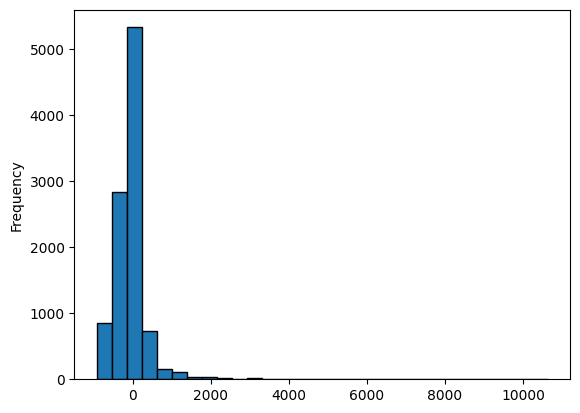

In [146]:
df_prod_copy_modified['discount'].plot.hist(bins=30, edgecolor='black')


In [147]:
df_prod_copy_modified.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,discount
15334,REP0315,volume button repair on vibration control and ...,Repair service including parts and labor for i...,79.990,799.8950,0,"1,44E+11",-719.9050
18391,SAT0060,Satechi baseload 7 USB (2 USB-C) Ports White,Charging Dock with 7 USB ports (2 USB-C) ports...,59.990,43.9900,1,13615399,16.0000
12215,MOS0188,Moshi USB-C Cable USB-A 1m,USB-C Cable connection with reversible USB-A f...,34.990,31.9900,1,1325,3.0000
11222,PAC1330,Pack QNAP TS-453A | 4GB RAM | Seagate 12TB Iro...,Pack NAS QNAP TS-453A with 4GB of RAM + memory...,1089.950,840.3680,1,12175397,249.5820
11293,DLK0107,D-Link DHP-P509AV PowerLine AV 500 Passthrough...,Internet amplifier kit with integrated socket.,42.990,419.8940,0,1334,-376.9040
2695,STA0030,Startech Adapter Cable Lightning to Micro USB-...,Cable Lightning to Micro USB adapter for charg...,22.990,22.9900,0,1325,0.0000
1982,SHE0022,Airmask SwitchEasy iPhone 6 Plus Silver Case,Protective cover with 360 degrees for iPhone 6...,29.990,199.8920,0,11865403,-169.9020
953,PAC0399,NewerTech miniStack Classic + 4TB,Mac external box Pack + 4TB Seagate Hard Drive.,197.969,177.9898,0,11935397,19.9792
19157,SAT0056-A,Open - Satechi USB 3.0 Hub 10/3 charging ports...,USB 3.0 Hub Refurbished 10-port 7 for data tra...,59.990,374.7520,0,12585395,-314.7620
10938,CRU0049,Crucial Mac Memory 8GB DDR3 1867MHz SO-DIMM,8GB 1867MHz RAM for Mac.,91.360,913.5980,1,1364,-822.2380


In [196]:
df_prod_copy_modified_2 = df_prod_copy_modified.copy()
#df_prod_copy_modified_2.loc[df_prod_copy_modified['discount']<0, 'promo_price'] = df_prod_copy_modified.loc[df_prod_copy_modified['discount']<0,'promo_price']/10

In [187]:
df_prod_copy_modified_2['promo_price'] = round(df_prod_copy_modified_2['promo_price'], 2)
df_prod_copy_modified_2['discount'] = df_prod_copy_modified_2['price'] - df_prod_copy_modified_2['promo_price']


In [213]:
df_prod_copy_modified_2.loc[df_prod_copy_modified_2['discount']<-1, 'promo_price'] = df_prod_copy_modified_2.loc[df_prod_copy_modified_2['discount']<-1,'promo_price']/10

In [214]:
df_prod_copy_modified_2['discount'] = df_prod_copy_modified_2['price'] - df_prod_copy_modified_2['promo_price']


In [215]:
df_prod_copy_modified_2.sample(10)

,sku,name,desc,price,promo_price,in_stock,type,discount
15418,REP0282,Wi-Fi antenna repair iPhone 5s,Repair service including parts and labor for i...,49.990,49.98990,0,"1,44E+11",0.00010
2977,GTE0055,G-Technology G-RAID USB 3.0 RAID 12TB Extraóble,extraóble disk RAID FireWire 800 and USB 3.0 f...,822.590,787.79350,0,11935397,34.79650
13330,APP1759,Apple iPad Mini 4 Wi-Fi 32GB Gold,Apple iPad Mini 4 32GB Wi-Fi.,429.000,43.28110,0,24861714,385.71890
14679,PAC1761,QNAP TS-231P NAS,NAS with 16TB capacity (2x8TB) WD Red hard dri...,934.590,764.17910,0,12175397,170.41090
16922,APP2184,"Apple iPad Smart Cover Case Pro 10.5 ""Blue Haze",Smart case with function on / off and adjust t...,59.000,56.00000,0,12635403,3.00000
1082,NON0007,Yoko Ono Non Violence Case iPhone 5 / 5S White,Yoko Ono hard case design for iPhone 5 / 5S.,14.990,4.99000,0,11865403,10.00000
3110,APP1171,Apple iPhone 6S 64GB Space Gray,New 64GB iPhone 6S Libre.,859.000,86.03306,0,NaN,772.96694
15495,BEL0175-A,Open - Belkin Thunderbolt Express Dock 2 HD,Dock with Thunderbolt cable and Thunderbolt 2.,249.990,219.00030,0,1298,30.98970
10837,PUR0137,Pure Battery Bank 3000mAh Battery Case with iP...,Battery Case for iPhone 6 / 6S.,74.950,69.99000,0,"5,49E+11",4.96000
11060,PAC1388,Pack QNAP TS-251 + | 2GB RAM | WD 16TB Network,Nas QNAP TS-251 + 2GB RAM memory + 16TB (2x8TB...,673.702,81.51794,1,12175397,592.18406


In [216]:
df_prod_copy_modified_2.loc[df_prod_copy_modified_2['sku']=='APP1635']

,sku,name,desc,price,promo_price,in_stock,type,discount
13362,APP1635,Apple iPhone 7 Plus 256GB Black,New Apple iPhone 7 Plus Free Black 256GB,1130.33,113.03312,0,85651716,1017.29688


In [217]:
df_prod_copy_modified_2.loc[df_prod_copy_modified_2['discount']<0]

,sku,name,desc,price,promo_price,in_stock,type,discount
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,24.9889,0,13835403,-0.0389
19,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.00,35.0005,0,13955395,-0.0005
39,JMO0026,Just Mobile Lazy Couch Support Mac and iPad,Mac and iPad small lift stand.,19.95,19.9892,0,8696,-0.0392
52,BLL0008,BlueLounge CableDrop Pack 6 Black,Cable management Mac iPhone iPad and iPod.,11.99,11.9911,0,12285400,-0.0011
55,BLL0012,Milo BlueLounge support iPhone and iPod white,Desktop support iPhone and iPod.,14.99,14.9919,0,1216,-0.0019
...,...,...,...,...,...,...,...,...
18237,BEL0308,Belkin Audio Adapter (Lightning Charge + Jack ...,Audio Adapter 35 mm + loaded with Lightning co...,34.99,34.9932,1,14365395,-0.0032
18357,BEL0347,Belkin VGA Video Cable 1.8m,VGA Monitor Cable 18m length for Mac and PC,12.99,12.9906,0,1325,-0.0006
18624,IFX0176,Full iFixit iPhone Battery Kit Battery change 7,Replacement Kit Internal Battery for Apple iPh...,62.99,62.9902,1,21485407,-0.0002
18663,QNA0259,QNAP rack rail kit,Rail kit for rackmount NAS servers in 1U,42.99,42.9901,0,1404,-0.0001


In [218]:
df_prod_copy_modified_2.describe()

,price,promo_price,in_stock,discount
count,10157.000000,10157.000000,10157.000000,10157.000000
mean,663.124629,525.947195,0.197893,137.177434
std,1355.237789,1156.469709,0.398431,483.731386
min,2.990000,0.900000,0.000000,-0.999500
25%,44.900000,29.989900,0.000000,5.999400
50%,119.000000,89.000300,0.000000,19.005600
75%,649.891000,464.989700,0.000000,90.001400
max,15339.000000,14419.004900,1.000000,10635.499600


<Axes: ylabel='Frequency'>

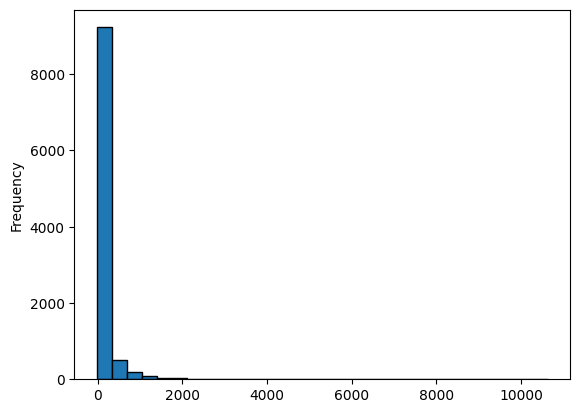

In [152]:
df_prod_copy_modified_2['discount'].plot.hist(bins=30, edgecolor='black')


In [153]:
agg_orderlines = df_orderlines_copy.groupby('sku')['unit_price'].agg(['mean', 'min', 'max']).reset_index()
agg_orderlines = agg_orderlines.rename(columns={'mean': 'unit_price_mean', 'min': 'unit_price_min', 'max': 'unit_price_max'})


In [154]:
agg_orderlines.sample(10)

,sku,unit_price_mean,unit_price_min,unit_price_max
4262,OWC0205,879.990000,879.99,879.99
1862,DLL0043-A,119.990000,119.99,119.99
2723,JMO0084,26.315000,24.29,26.99
6681,WDT0393,147.790000,147.79,147.79
420,APP0474,85.068718,76.49,89.00
4658,PAC1554,428.990000,428.99,428.99
5215,REP0240,51.503846,35.10,69.99
4579,PAC1438,310.000000,294.58,328.99
586,APP1214,80.534812,0.00,89.00
493,APP1040-A,50.770000,49.98,51.56


In [155]:
# Merge df_producopy_modified_2 with the aggregated unit_price values
merged_df = pd.merge(df_prod_copy_modified_2, agg_orderlines, on='sku', how='inner')
merged_df.head()
merged_df[['sku', 'promo_price', 'unit_price_mean']].describe()

,promo_price,unit_price_mean
count,6542.000000,6542.000000
mean,186.091970,169.270744
std,315.154432,231.398330
min,0.900000,0.000000
25%,26.990000,26.311679
50%,59.990000,58.490000
75%,208.997500,200.619286
max,6748.000000,999.170000


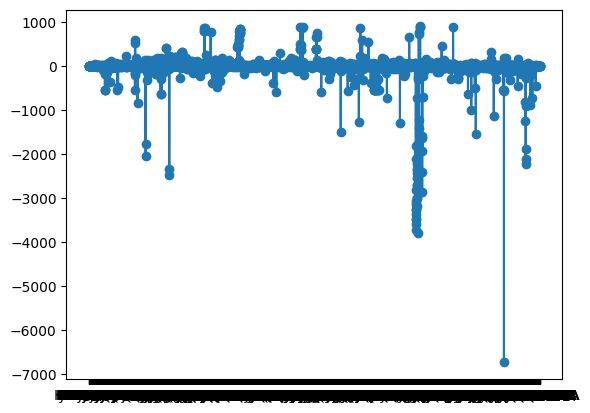

In [160]:
# Plot both 'unit_price_mean' and 'promo_price'
plt.plot(merged_df['sku'], merged_df['unit_price_mean']-merged_df['promo_price'], label='difference between Unit Price (Mean) and promo_price', marker='o')
#plt.plot(merged_df['sku'], merged_df['promo_price'], label='Promo Price', marker='o')

#plt.bar(merged_df['sku'], merged_df['unit_price_mean'], label='Unit Price (Mean)')
#plt.bar(merged_df['sku'] + 0.4, merged_df['promo_price'], width=0.4, label='Promo Price')

# Set x-axis labels and title
#plt.xlabel('SKU')
#plt.ylabel('Price')
#plt.title('Comparison of Unit Price (Mean) and Promo Price')
